In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F

import datetime

In [3]:
spark = SparkSession.builder.master('local[1]').appName("Jupyter").getOrCreate()
sc = spark.sparkContext

In [4]:

#test if this works
# import necessary libraries
import pandas as pd 
import numpy
import matplotlib.pyplot as plt 

import scipy


# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')


from pyspark.sql import SparkSession
# create sparksession
spark = SparkSession \
    .builder \
    .appName("Pysparkexample") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [5]:
#collisions = spark.read.csv('data/accidents.csv', header='true', inferSchema = True)
#collisions.show(2)

df_new = spark.read.csv('data/accidents_new.csv', header='true', inferSchema = True)

#### Data Schema
Print the data schema for our dataset - SAAQ Accident Information

In [6]:
df_new.printSchema()

root
 |-- ID: string (nullable = true)
 |-- DATE: timestamp (nullable = true)
 |-- WEEK_DAY: string (nullable = true)
 |-- REG: string (nullable = true)
 |-- MUNCP: string (nullable = true)
 |-- STREET: string (nullable = true)
 |-- TYPE_ACCDN: integer (nullable = true)
 |-- SURFACE: integer (nullable = true)
 |-- LIGHT: integer (nullable = true)
 |-- STR_ASPCT: integer (nullable = true)
 |-- STR_CONFIG: integer (nullable = true)
 |-- METEO: integer (nullable = true)
 |-- GRAVITE: string (nullable = true)
 |-- NB_VEH_IMPLIQUES_ACCDN: integer (nullable = true)
 |-- NB_VICTIMES_TOTAL: integer (nullable = true)
 |-- NB_MORTS: integer (nullable = true)
 |-- NB_BLESSES_GRAVES: integer (nullable = true)
 |-- NB_BLESS_LEGERS: integer (nullable = true)
 |-- NB_DECES_PIETON: integer (nullable = true)
 |-- NB_BLESSES_PIETON: integer (nullable = true)
 |-- NB_VICTIMES_PIETON: integer (nullable = true)
 |-- NB_DECES_MOTO: integer (nullable = true)
 |-- NB_BLESSES_MOTO: integer (nullable = true)
 |

In [7]:

print('The total number of rows : ', df_new.count(), '\nThe total number of columns :', len(df_new.columns))

The total number of rows :  128647 
The total number of columns : 40


#### Data Totals
Totals for various accident records

In [8]:
from pyspark.sql import functions as func

#df_new.agg(func.sum("NB_BLESSES_VELO").alias('Velo'),func.sum("NB_VICTIMES_MOTO"),func.sum("NB_VEH_IMPLIQUES_ACCDN")).show()

df_new.agg(func.sum("NB_VEH_IMPLIQUES_ACCDN").alias('Ttl Cars In Accidents')).show()
df_new.agg(func.sum("NB_VICTIMES_TOTAL").alias('Ttl Victims')).show()
df_new.agg(func.sum("NB_MORTS").alias('Ttl Deaths')).show()
df_new.agg(func.sum("NB_BLESSES_GRAVES").alias('Ttl Severe Injuries')).show()
df_new.agg(func.sum("NB_BLESS_LEGERS").alias('Ttl Light Injuries')).show()
df_new.agg(func.sum("NB_DECES_PIETON").alias('Ttl Pedestrian Deaths')).show()
df_new.agg(func.sum("NB_BLESSES_PIETON").alias('Ttl Pedestrian Injuries')).show()
df_new.agg(func.sum("NB_VICTIMES_PIETON").alias('Ttl Pedestrian Victims')).show()
df_new.agg(func.sum("NB_DECES_MOTO").alias('Ttl Moto Deaths')).show()
df_new.agg(func.sum("NB_BLESSES_MOTO").alias('Ttl Moto Injuries')).show()
df_new.agg(func.sum("NB_VICTIMES_MOTO").alias('Ttl Moto Victims')).show()
df_new.agg(func.sum("NB_DECES_VELO").alias('Ttl Bike Deaths')).show()
df_new.agg(func.sum("NB_BLESSES_VELO").alias('Ttl Bike Injuries')).show()
df_new.agg(func.sum("NB_VICTIMES_VELO").alias('Ttl Bike Victims')).show()
df_new.agg(func.sum("nb_automobile_camion_leger").alias('Ttl Car - Light Trucks')).show()
df_new.agg(func.sum("nb_camionLourd_tractRoutier").alias('Ttl Heavy Truck - Tractor')).show()
df_new.agg(func.sum("nb_outil_equipement").alias('Ttl Equipment - Tools')).show()
df_new.agg(func.sum("nb_tous_autobus_minibus").alias('Ttl Bus')).show()
df_new.agg(func.sum("nb_bicyclette").alias('Ttl Bikes')).show()
df_new.agg(func.sum("nb_cyclomoteur").alias('Ttl Motorized Bike')).show()
df_new.agg(func.sum("nb_motocyclette").alias('Ttl Motorcycle')).show()
df_new.agg(func.sum("nb_taxi").alias('Ttl Taxi')).show()
df_new.agg(func.sum("nb_urgence").alias('Ttl Emergency')).show()
df_new.agg(func.sum("nb_motoneige").alias('Ttl Snowmobile')).show()
df_new.agg(func.sum("nb_VHR").alias('Ttl Motorhome')).show()
df_new.agg(func.sum("nb_autres_types").alias('Ttl Other Types')).show()
df_new.agg(func.sum("nb_veh_non_precise").alias('Ttl Non Specified Vehicles')).show()

+---------------------+
|Ttl Cars In Accidents|
+---------------------+
|               251681|
+---------------------+

+-----------+
|Ttl Victims|
+-----------+
|      39532|
+-----------+

+----------+
|Ttl Deaths|
+----------+
|       170|
+----------+

+-------------------+
|Ttl Severe Injuries|
+-------------------+
|               1339|
+-------------------+

+------------------+
|Ttl Light Injuries|
+------------------+
|             38023|
+------------------+

+---------------------+
|Ttl Pedestrian Deaths|
+---------------------+
|                   97|
+---------------------+

+-----------------------+
|Ttl Pedestrian Injuries|
+-----------------------+
|                   7255|
+-----------------------+

+----------------------+
|Ttl Pedestrian Victims|
+----------------------+
|                  7352|
+----------------------+

+---------------+
|Ttl Moto Deaths|
+---------------+
|             11|
+---------------+

+-----------------+
|Ttl Moto Injuries|
+---------------

In [9]:

# Create temporary table query with SQL
df_new.createOrReplaceTempView('AccidentData')
spark.sql(
'''
SELECT * FROM AccidentData

LIMIT 10
'''
).show()




+----------------+-------------------+--------+------------+-------------------+-----------+----------+-------+-----+---------+----------+-----+--------------------+----------------------+-----------------+--------+-----------------+---------------+---------------+-----------------+------------------+-------------+---------------+----------------+-------------+---------------+----------------+--------------------------+---------------------------+-------------------+-----------------------+-------------+--------------+---------------+-------+----------+------------+------+---------------+------------------+
|              ID|               DATE|WEEK_DAY|         REG|              MUNCP|     STREET|TYPE_ACCDN|SURFACE|LIGHT|STR_ASPCT|STR_CONFIG|METEO|             GRAVITE|NB_VEH_IMPLIQUES_ACCDN|NB_VICTIMES_TOTAL|NB_MORTS|NB_BLESSES_GRAVES|NB_BLESS_LEGERS|NB_DECES_PIETON|NB_BLESSES_PIETON|NB_VICTIMES_PIETON|NB_DECES_MOTO|NB_BLESSES_MOTO|NB_VICTIMES_MOTO|NB_DECES_VELO|NB_BLESSES_VELO|NB_VIC

#### Accident victims by municipality

In [10]:
plot_df = spark.sql(
'''
SELECT MUNCP, SUM(NB_VICTIMES_TOTAL) as Total FROM AccidentData
GROUP BY MUNCP
ORDER BY Total DESC

'''
).show()

+--------------------+-----+
|               MUNCP|Total|
+--------------------+-----+
|            Montréal|36307|
|       Pointe-Claire|  616|
| Dollard-Des Ormeaux|  566|
|          Mont-Royal|  442|
|              Dorval|  425|
|           Westmount|  274|
|      Côte-Saint-Luc|  237|
|            Kirkland|  184|
|        Beaconsfield|  126|
|        Montréal-Est|  122|
|Sainte-Anne-de-Be...|   94|
|           Hampstead|   74|
|      Montréal-Ouest|   31|
|         Baie-D'Urfé|   28|
|          Senneville|    4|
|        L'Île-Dorval|    2|
+--------------------+-----+



#### Municipality Ranking by total number of victims

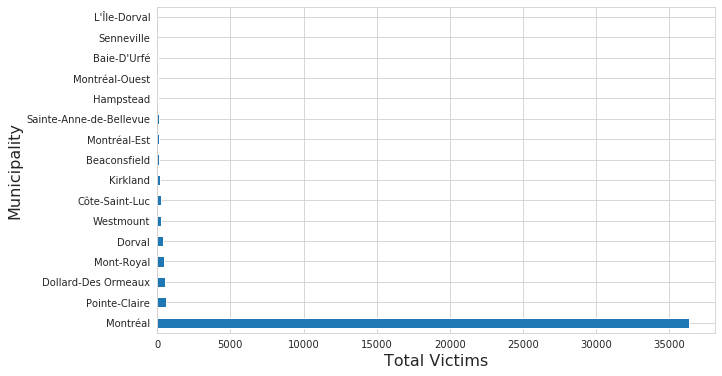

In [11]:


plot_df = spark.sql(
'''
SELECT MUNCP, SUM(NB_VICTIMES_TOTAL) as Total FROM AccidentData
GROUP BY MUNCP
ORDER BY Total DESC

'''
).toPandas()

fig,ax = plt.subplots(1,1,figsize=(10,6))
plot_df.plot(x = 'MUNCP', y = 'Total', kind = 'barh', color = 'C0', ax = ax, legend = False)
ax.set_xlabel('Total Victims', size = 16)
ax.set_ylabel('Municipality', size = 16)
plt.savefig('barplot.png')
plt.show()

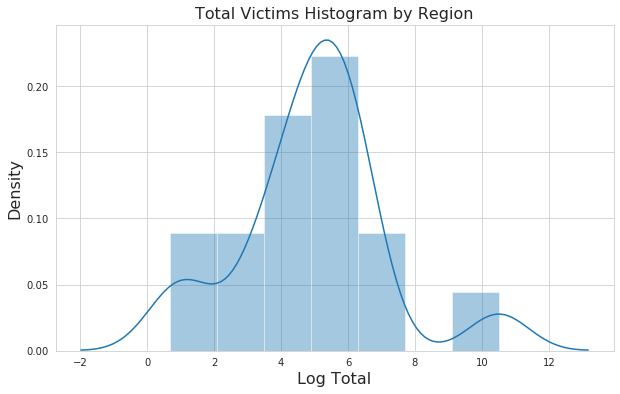

In [12]:
import numpy as np
import seaborn as sns
plot_df2 = spark.sql(
'''
SELECT MUNCP, SUM(NB_VICTIMES_TOTAL) as Total FROM AccidentData
GROUP BY MUNCP

'''
).toPandas()
plt.figure(figsize = (10,6))
sns.distplot(np.log(plot_df2['Total']))
plt.title('Total Victims Histogram by Region', size = 16)
plt.ylabel('Density', size = 16)
plt.xlabel('Log Total', size = 16)
plt.savefig('distplot.png')
plt.show()

#### Total Collisions by Day of Week

In [13]:
plot_df = spark.sql(
'''
SELECT WEEK_DAY, COUNT(WEEK_DAY) as Number_of_Collisions FROM AccidentData
GROUP BY WEEK_DAY
ORDER BY Number_of_Collisions DESC

'''
).show()

+--------+--------------------+
|WEEK_DAY|Number_of_Collisions|
+--------+--------------------+
|      VE|               20965|
|      JE|               20618|
|      ME|               19468|
|      MA|               19195|
|      LU|               17810|
|      SA|               16633|
|      DI|               13958|
+--------+--------------------+



#### Number of collisions by weekday 

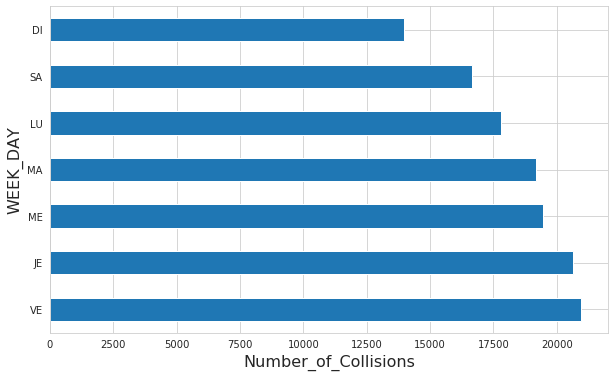

In [14]:
plot_df = spark.sql(
'''
SELECT WEEK_DAY, COUNT(WEEK_DAY) as Number_of_Collisions FROM AccidentData
GROUP BY WEEK_DAY
ORDER BY Number_of_Collisions DESC

'''
).toPandas()

fig,ax = plt.subplots(1,1,figsize=(10,6))
plot_df.plot(x = 'WEEK_DAY', y = 'Number_of_Collisions', kind = 'barh', color = 'C0', ax = ax, legend = False)
ax.set_xlabel('Number_of_Collisions', size = 16)
ax.set_ylabel('WEEK_DAY', size = 16)
plt.savefig('barplot.png')
plt.show()

#### Top 10 Accidents by street

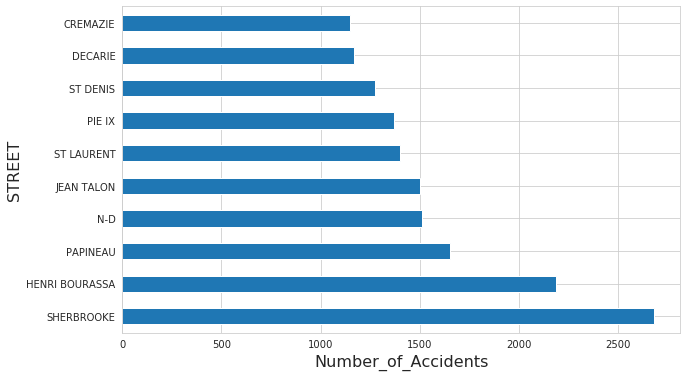

In [15]:
plot_df = spark.sql(
'''
SELECT STREET, COUNT(STREET) as Number_of_Accidents FROM AccidentData
GROUP BY STREET
ORDER BY Number_of_Accidents DESC
LIMIT 10

'''
).toPandas()

fig,ax = plt.subplots(1,1,figsize=(10,6))
plot_df.plot(x = 'STREET', y = 'Number_of_Accidents', kind = 'barh', color = 'C0', ax = ax, legend = False)
ax.set_xlabel('Number_of_Accidents', size = 16)
ax.set_ylabel('STREET', size = 16)
plt.savefig('barplot.png')
plt.show()

#### Heatmap
The Heatmap illustrates the corellation between various dataset parameters.

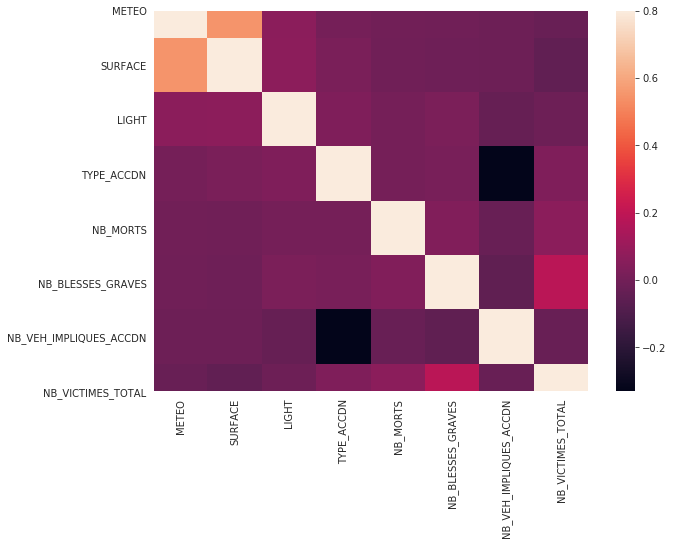

In [16]:
plot_df = spark.sql(
'''
SELECT METEO, SURFACE, LIGHT, TYPE_ACCDN, 
NB_MORTS, NB_BLESSES_GRAVES, NB_VEH_IMPLIQUES_ACCDN, NB_VICTIMES_TOTAL
FROM AccidentData

'''
).toPandas()


corrmat = plot_df.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [22]:
#https://spark.apache.org/docs/latest/mllib-ensembles.html

from pyspark.mllib.tree import RandomForest, RandomForestModel
from pyspark.mllib.util import MLUtils

# Load and parse the data file into an RDD of LabeledPoint.
#data = MLUtils.loadLibSVMFile(sc, 'data/mllib/sample_libsvm_data.txt')
data = MLUtils.loadLibSVMFile(sc, 'data/accidents_new.csv')

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 84.0 failed 1 times, most recent failure: Lost task 0.0 in stage 84.0 (TID 1695, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 377, in main
    process()
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 372, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 393, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/util.py", line 99, in wrapper
    return f(*args, **kwargs)
  File "/usr/local/spark/python/pyspark/mllib/util.py", line 123, in <lambda>
    parsed = lines.map(lambda l: MLUtils._parse_libsvm_line(l))
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/mllib/util.py", line 48, in _parse_libsvm_line
    label = float(items[0])
ValueError: could not convert string to float: 'NB_VEH_IMPLIQUES_ACCDN,NB_VICTIMES_TOTAL,NB_MORTS,NB_BLESSES_GRAVES,NB_BLESS_LEGERS,NB_DECES_PIETON,NB_BLESSES_PIETON,NB_VICTIMES_PIETON,NB_DECES_MOTO,NB_BLESSES_MOTO,NB_VICTIMES_MOTO,NB_DECES_VELO,NB_BLESSES_VELO,NB_VICTIMES_VELO,nb_automobile_camion_leger,nb_camionLourd_tractRoutier,nb_outil_equipement,nb_tous_autobus_minibus,nb_bicyclette,nb_cyclomoteur,nb_motocyclette,nb_taxi,nb_urgence,nb_motoneige,nb_VHR,nb_autres_types,nb_veh_non_precise'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:456)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:592)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:575)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:410)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at org.apache.spark.storage.memory.MemoryStore.putIterator(MemoryStore.scala:221)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsBytes(MemoryStore.scala:349)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1182)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1156)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:1091)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1156)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:882)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:335)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:286)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1889)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1877)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1876)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1876)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2110)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 377, in main
    process()
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 372, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 393, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/util.py", line 99, in wrapper
    return f(*args, **kwargs)
  File "/usr/local/spark/python/pyspark/mllib/util.py", line 123, in <lambda>
    parsed = lines.map(lambda l: MLUtils._parse_libsvm_line(l))
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/mllib/util.py", line 48, in _parse_libsvm_line
    label = float(items[0])
ValueError: could not convert string to float: 'NB_VEH_IMPLIQUES_ACCDN,NB_VICTIMES_TOTAL,NB_MORTS,NB_BLESSES_GRAVES,NB_BLESS_LEGERS,NB_DECES_PIETON,NB_BLESSES_PIETON,NB_VICTIMES_PIETON,NB_DECES_MOTO,NB_BLESSES_MOTO,NB_VICTIMES_MOTO,NB_DECES_VELO,NB_BLESSES_VELO,NB_VICTIMES_VELO,nb_automobile_camion_leger,nb_camionLourd_tractRoutier,nb_outil_equipement,nb_tous_autobus_minibus,nb_bicyclette,nb_cyclomoteur,nb_motocyclette,nb_taxi,nb_urgence,nb_motoneige,nb_VHR,nb_autres_types,nb_veh_non_precise'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:456)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:592)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:575)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:410)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at org.apache.spark.storage.memory.MemoryStore.putIterator(MemoryStore.scala:221)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsBytes(MemoryStore.scala:349)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1182)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1156)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:1091)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1156)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:882)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:335)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:286)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [20]:






#data = data1['NB_VEH_IMPLIQUES_ACCDN','NB_VICTIMES_TOTAL','NB_MORTS','NB_BLESSES_GRAVES','NB_BLESS_LEGERS','NB_DECES_PIETON']

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a RandomForest model.
#  Empty categoricalFeaturesInfo indicates all features are continuous.
#  Note: Use larger numTrees in practice.
#  Setting featureSubsetStrategy="auto" lets the algorithm choose.
model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo={},
                                    numTrees=3, featureSubsetStrategy="auto",
                                    impurity='variance', maxDepth=4, maxBins=32)

# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda lp: (lp[0] - lp[1]) * (lp[0] - lp[1])).sum() /\
    float(testData.count())
print('Test Mean Squared Error = ' + str(testMSE))
print('Learned regression forest model:')
print(model.toDebugString())



Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 82.0 failed 1 times, most recent failure: Lost task 0.0 in stage 82.0 (TID 1693, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 377, in main
    process()
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 372, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 393, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/util.py", line 99, in wrapper
    return f(*args, **kwargs)
  File "/usr/local/spark/python/pyspark/mllib/util.py", line 123, in <lambda>
    parsed = lines.map(lambda l: MLUtils._parse_libsvm_line(l))
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/mllib/util.py", line 48, in _parse_libsvm_line
    label = float(items[0])
ValueError: could not convert string to float: 'TYPE_ACCDN,SURFACE,LIGHT,STR_ASPCT,STR_CONFIG,METEO,NB_VEH_IMPLIQUES_ACCDN,NB_VICTIMES_TOTAL,NB_MORTS,NB_BLESSES_GRAVES,NB_BLESS_LEGERS,NB_DECES_PIETON,NB_BLESSES_PIETON,NB_VICTIMES_PIETON,NB_DECES_MOTO,NB_BLESSES_MOTO,NB_VICTIMES_MOTO,NB_DECES_VELO,NB_BLESSES_VELO,NB_VICTIMES_VELO,nb_automobile_camion_leger,nb_camionLourd_tractRoutier,nb_outil_equipement,nb_tous_autobus_minibus,nb_bicyclette,nb_cyclomoteur,nb_motocyclette,nb_taxi,nb_urgence,nb_motoneige,nb_VHR,nb_autres_types,nb_veh_non_precise'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:456)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:592)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:575)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:410)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at org.apache.spark.storage.memory.MemoryStore.putIterator(MemoryStore.scala:221)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsBytes(MemoryStore.scala:349)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1182)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1156)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:1091)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1156)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:882)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:335)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:286)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1889)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1877)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1876)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1876)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2110)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 377, in main
    process()
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 372, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 393, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/util.py", line 99, in wrapper
    return f(*args, **kwargs)
  File "/usr/local/spark/python/pyspark/mllib/util.py", line 123, in <lambda>
    parsed = lines.map(lambda l: MLUtils._parse_libsvm_line(l))
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/mllib/util.py", line 48, in _parse_libsvm_line
    label = float(items[0])
ValueError: could not convert string to float: 'TYPE_ACCDN,SURFACE,LIGHT,STR_ASPCT,STR_CONFIG,METEO,NB_VEH_IMPLIQUES_ACCDN,NB_VICTIMES_TOTAL,NB_MORTS,NB_BLESSES_GRAVES,NB_BLESS_LEGERS,NB_DECES_PIETON,NB_BLESSES_PIETON,NB_VICTIMES_PIETON,NB_DECES_MOTO,NB_BLESSES_MOTO,NB_VICTIMES_MOTO,NB_DECES_VELO,NB_BLESSES_VELO,NB_VICTIMES_VELO,nb_automobile_camion_leger,nb_camionLourd_tractRoutier,nb_outil_equipement,nb_tous_autobus_minibus,nb_bicyclette,nb_cyclomoteur,nb_motocyclette,nb_taxi,nb_urgence,nb_motoneige,nb_VHR,nb_autres_types,nb_veh_non_precise'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:456)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:592)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:575)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:410)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at org.apache.spark.storage.memory.MemoryStore.putIterator(MemoryStore.scala:221)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsBytes(MemoryStore.scala:349)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1182)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1156)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:1091)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1156)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:882)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:335)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:286)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [ ]:
# Save and load model
model.save(sc, "target/tmp/myRandomForestRegressionModel")
sameModel = RandomForestModel.load(sc, "target/tmp/myRandomForestRegressionModel")